In [49]:
import pandas as pd
pd.options.display.max_columns = None
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable

In [50]:
df = pd.read_csv("../Archivos/union_datos.csv")

In [51]:
df.columns

Index(['age', 'gender', 'pais', 'estudios', 'puesto_trabajo', 'experiencia',
       'lenguaje_recomendado', 'experiencia_ML', 'industria', 'tamaño_empresa',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=138)

In [52]:
df.head(3)

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16,Q17,Q32,Q34,Q10_kaggle,Q10_colab,Q10_none,Q28,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,Oracle Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,MySQL,NaN,SQLite,Oracle Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Data Studio,NaN,NaN,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",$0-999,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,NaN,"MySQL ,

In [53]:
df.age.dtypes

dtype('O')

In [54]:
df[df["puesto_trabajo"]!= "Student"].stb.freq(["puesto_trabajo"])

,puesto_trabajo,count,percent,cumulative_count,cumulative_percent
0,Data Scientist,3616,18.863790,3616,18.863790
1,Software Engineer,2449,12.775836,6065,31.639626
2,Other,2393,12.483698,8458,44.123324
3,Data Analyst,2301,12.003756,10759,56.127080
4,Currently not employed,1986,10.360478,12745,66.487558
5,Research Scientist,1538,8.023371,14283,74.510929
6,Machine Learning Engineer,1499,7.819918,15782,82.330847
7,Business Analyst,968,5.049820,16750,87.380667
8,Program/Project Manager,849,4.429026,17599,91.809693
9,Data Engineer,668,3.484793,18267,95.294486


In [55]:
df.puesto_trabajo.value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto_trabajo, dtype: int64

---

### Unir columnas de partes

---

Intentando unir la col 39

In [56]:
df_copia = df.copy()
df_copia.head(1)


,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16,Q17,Q32,Q34,Q10_kaggle,Q10_colab,Q10_none,Q28,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Pasamos una función para unirlos, borra los nan y los convierte en un string vacío
df_copia['concat_q39'] = df_copia[['Q39_Part_1','Q39_Part_2','Q39_Part_3','Q39_Part_4','Q39_Part_5','Q39_Part_6','Q39_Part_7', 'Q39_Part_8','Q39_Part_9','Q39_OTHER']].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
# Reemplazamos los strings vacios por nan
df_copia["concat_q39"].replace("", np.nan, inplace=True)

In [58]:
df_copia.concat_q39.unique()

array([' GitHub , Kaggle ', nan, 'I do not share my work publicly',
       ' Plotly Dash , Kaggle ', ' Kaggle ', ' GitHub , Kaggle , Colab ',
       'Other',
       ' Plotly Dash , Streamlit , GitHub , Personal blog , Kaggle , Colab ',
       ' GitHub ', ' Colab ', ' Kaggle , Colab ',
       ' Streamlit , NBViewer ', ' GitHub , Personal blog ',
       ' Personal blog ', ' NBViewer , GitHub , Kaggle , Colab ',
       ' GitHub , Personal blog , Shiny ',
       ' GitHub , Personal blog , Colab ',
       ' Plotly Dash , Streamlit , GitHub ', ' GitHub ,Other',
       ' GitHub , Colab ',
       ' Plotly Dash , Streamlit , GitHub , Colab , Shiny ',
       ' NBViewer , GitHub , Colab ', ' Plotly Dash , Streamlit ',
       ' Streamlit , GitHub , Kaggle , Colab ',
       ' Streamlit , GitHub , Personal blog ',
       ' Streamlit , GitHub , Kaggle ', ' Personal blog , Kaggle ',
       ' Plotly Dash , Streamlit , Shiny ',
       ' Plotly Dash , Streamlit , GitHub , Kaggle ',
       ' Plotly Dash ,

In [59]:
#Definimos la función para que se unan las columnas restantes
def concat(df,col_ini, col_fin,nombre):
    columnas = df.loc[:,col_ini:col_fin].columns
    df[nombre] = df[columnas].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
    df[nombre].replace("", np.nan, inplace=True)
    df.drop(columnas, axis = 1, inplace = True) #Eliminas las columnas concatenadas
    

In [60]:
#Aplicamos a Q39
concat(df,'Q39_Part_1','Q39_OTHER','q39_plat_compartir_trabajo')

In [61]:
#Aplicamos a Q40
concat(df,'Q40_Part_1','Q40_OTHER','q40_plat_cursos')

In [62]:
#Aplicamos a Q27_B
concat(df,'Q27_B_Part_1','Q27_B_OTHER','q27_plat_familiar_cloud_computing')

In [63]:
#Aplicamos a Q29_B
concat(df,'Q29_B_Part_1','Q29_B_OTHER','q29b_productos_familiar_cloud_computing')

In [64]:
#Aplicamos a Q31_B
concat(df,'Q31_B_Part_1','Q31_B_OTHER','q31b_productos_familiar_ml')

In [65]:
#Aplicamos a Q32_B
concat(df,'Q32_B_Part_1','Q32_B_OTHER','q32b_productos_familiar_bd')

In [66]:
#Aplicamos a Q34_B
concat(df,'Q34_B_Part_1','Q34_B_OTHER','q34b_herramientas_familiar_bi')

In [67]:
#Aplicamos a Q36_B
concat(df,'Q36_B_Part_1','Q36_B_OTHER','q36b_cat_herramientas_familiar_ml')

In [68]:
#Aplicamos a Q37_B
concat(df,'Q37_B_Part_1','Q37_B_OTHER','q37b_cat_herramientas_familiar_ml_aut')

In [69]:
#Aplicamos a Q38_B
concat(df,'Q38_B_Part_1','Q38_B_OTHER','q38b_herramientas_familiar_gest_exp_ml')

In [70]:
df.head()

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16,Q17,Q32,Q34,Q10_kaggle,Q10_colab,Q10_none,Q28,q39_plat_compartir_trabajo,q40_plat_cursos,q27_plat_familiar_cloud_computing,q29b_productos_familiar_cloud_computing,q31b_productos_familiar_ml,q32b_productos_familiar_bd,q34b_herramientas_familiar_bi,q36b_cat_herramientas_familiar_ml,q37b_cat_herramientas_familiar_ml_aut,q38b_herramientas_familiar_gest_exp_ml
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,"GitHub , Kaggle","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,"Kaggle Learn Courses,Cloud-certification progr...","Google Cloud Platform (GCP) , Oracle Cloud",Google Cloud Compute Engine,None,"MySQL ,SQLite ,Oracle Database ,Google Cloud SQL","Google Data Studio,Qlik","Automated model selection (e.g. auto-sklearn, ...",Google Cloud AutoML,None
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",$0-999,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,NaN,"MySQL , MongoDB",None,Kaggle Notebooks,NaN,NaN,NaN,I do not share my work publicly,DataCamp,"Amazon Web Services (AWS) , Google Cloud Plat...","Microsoft Azure Virtual Machines , Google Clo...","Azure Machine Learning Studio , Google Cloud ...","MySQL ,PostgreSQL ,MongoDB","Microsoft Power BI,Tableau","Automated model selection (e.g. auto-sklearn, ...",DataRobot AutoML,TensorBoard
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,5-10 years,Academics/Education,"1000-9,999 employees","30,000-39,999","Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,"Coursera,edX","Amazon Web Services (AWS) , Microsoft Azure","Microsoft Azure Virtual Machines , Google Clo...",None,None,None,None,NaN,None
4,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,10-20 years,Academics/Education,50-249 employees,"30,000-39,999","Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",None,Microsoft Power BI,NaN,NaN,NaN,NaN,I do not share my work publicly,"Kaggle Learn Courses,Udemy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Columna salario

In [71]:
df["salario"].unique()

array(['25,000-29,999', '60,000-69,999', '$0-999', '30,000-39,999', nan,
       '15,000-19,999', '70,000-79,999', '2,000-2,999', '10,000-14,999',
       '5,000-7,499', '20,000-24,999', '1,000-1,999', '100,000-124,999',
       '7,500-9,999', '4,000-4,999', '40,000-49,999', '50,000-59,999',
       '3,000-3,999', '300,000-499,999', '200,000-249,999',
       '125,000-149,999', '250,000-299,999', '80,000-89,999',
       '90,000-99,999', '150,000-199,999', '>$1,000,000',
       '$500,000-999,999'], dtype=object)

In [72]:
def limpiar(x):
    try:
        return x.split("-")[1].replace(",","")
    except:
        return x

In [73]:
def quitar_dolar(x):
    try:
        return x.replace(">$","").replace(",","")
    except:
        return x

In [74]:
df["salario"] = df["salario"].apply(limpiar).apply(quitar_dolar).astype("Int64", errors= "raise")

In [75]:
df["salario"].unique()

<IntegerArray>
[  29999,   69999,     999,   39999,    <NA>,   19999,   79999,    2999,
   14999,    7499,   24999,    1999,  124999,    9999,    4999,   49999,
   59999,    3999,  499999,  249999,  149999,  299999,   89999,   99999,
  199999, 1000000,  999999]
Length: 27, dtype: Int64

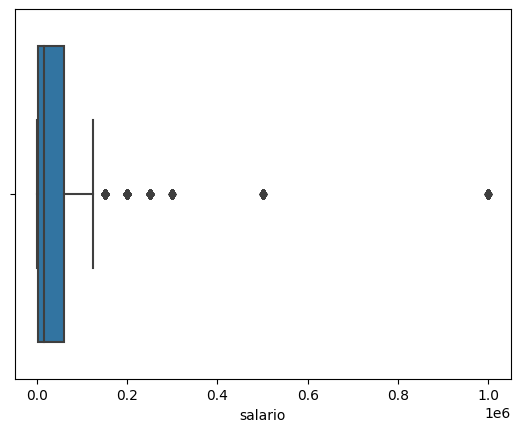

In [76]:
sns.boxplot(x= "salario", data=df[(df["puesto_trabajo"]!= "Student")]);

In [77]:
df["salario"].dtype

Int64Dtype()

### Renombrar últimas columnas

In [78]:
q_restantes = {'Q16':'Q16_frame_ml','Q17':'Q17_alg_ml','Q32':'Q32_prod_bigdata','Q34':'Q34_herramientas_bi'}

In [79]:
df.rename(columns = q_restantes, inplace =True)
df.head(2)

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16_frame_ml,Q17_alg_ml,Q32_prod_bigdata,Q34_herramientas_bi,Q10_kaggle,Q10_colab,Q10_none,Q28,q39_plat_compartir_trabajo,q40_plat_cursos,q27_plat_familiar_cloud_computing,q29b_productos_familiar_cloud_computing,q31b_productos_familiar_ml,q32b_productos_familiar_bd,q34b_herramientas_familiar_bi,q36b_cat_herramientas_familiar_ml,q37b_cat_herramientas_familiar_ml_aut,q38b_herramientas_familiar_gest_exp_ml
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,29999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,"GitHub , Kaggle","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",69999,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,"Kaggle Learn Courses,Cloud-certification progr...","Google Cloud Platform (GCP) , Oracle Cloud",Google Cloud Compute Engine,None,"MySQL ,SQLite ,Oracle Database ,Google Cloud SQL","Google Data Studio,Qlik","Automated model selection (e.g. auto-sklearn, ...",Google Cloud AutoML,None


In [80]:
#Guardamos un nuevo csv con todos los cambios realizados
df.to_csv("../Archivos/archivo_limpio_pruebas.csv", index = False)

## Separar las columnas concatenadas en otros df para la visualizacion

In [81]:
# Hacemos un nuevo DF solo con las columnas, edad, genero, puesto de trabajo y concat_q39
df_q39 = df_copia[["age", "gender", "puesto_trabajo", "concat_q39"]]

In [82]:
# Hacemos un split para convertirlo en lista
df_q39.loc[:,"concat_q39"] = df_q39['concat_q39'].str.split(",")

/tmp/ipykernel_1749/4023251198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q39.loc[:,"concat_q39"] = df_q39['concat_q39'].str.split(",")
